In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
#  Создаем базу данных и коннектимся к ней
con = sqlite3.connect("practice.db")
cur = con.cursor()

In [3]:
#  Создаем таблицу university
cur.execute("""
CREATE TABLE university(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  title TEXT NOT NULL,
  year INTEGER NOT NULL
)
""")

In [4]:
#  Создаем таблицу people
cur.execute("""
CREATE TABLE people(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT NOT NULL,
  second_name TEXT NOT NULL,
  year_of_birth INTEGER,
  university_id INTEGER
)
""")

In [5]:
#  Добавляем строки в таблицу university
cur.execute("""INSERT INTO university(title, year)
VALUES
  ('Saratov State University', 1909),
  ('Saratov State Technical University', 1930),
  ('Saratov State Law Academy', 1931)
""")

In [6]:
#  Добавляем строки в таблицу people
cur.execute("""INSERT INTO people(first_name, second_name, year_of_birth, university_id)
VALUES
  ('Anna', 'Krilova', 2000, 1),
  ('Daniil', 'Logunov', 1998, 2),
  ('Ivan', 'Popov', 1999, 3),
  ('Alena', 'Silina', 1999, 3),
  ('Konstantin', 'Sharov', 2001, 2),
  ('Anna', 'Teterina', 1998, 2),
  ('Stanislav', 'Vlasov', 2002, 3),
  ('Ulyana', 'Likhacheva', 2000, 1),
  ('Anna', 'Ivanova', 1999, 1),
  ('Diana', 'Ovchinnikova', 1997, 3),
  ('Valery', 'Zhdanov', 2002, 2),
  ('Alla', 'Kuznetsova', 2003, 2)
""")

# Запросы к таблицам

Общая структура запросов:

`SELECT` (столбцы или * для выбора всех столбцов; **обязательно**)<br>
`FROM` (таблица; **обязательно**)<br>
`WHERE` (условие/фильтрация, например, year = 1909; **необязательно**)<br>
`GROUP BY` (столбец, по которому хотим сгруппировать данные; **необязательно**)<br>
`HAVING` (условие/фильтрация на уровне сгруппированных данных; **необязательно**)<br>
`ORDER BY` (столбец, по которому хотим отсортировать вывод; **необязательно**)

## SELECT ... FROM ...

SELECT, FROM — обязательные элементы запроса, которые определяют выбранные столбцы, их порядок и источник данных.

**Синтаксис:**
```
SELECT col_1, col_2 FROM table_name
```

Выбрать все обозначается как *:
```
SELECT * FROM table_name
```

Выведем поля `first_name`, `second_name` и `year_of_birth` из таблицы **people**

In [7]:
cur.execute("""SELECT first_name, second_name, year_of_birth FROM people""").fetchall()

[('Anna', 'Krilova', 2000),
 ('Daniil', 'Logunov', 1998),
 ('Ivan', 'Popov', 1999),
 ('Alena', 'Silina', 1999),
 ('Konstantin', 'Sharov', 2001),
 ('Anna', 'Teterina', 1998),
 ('Stanislav', 'Vlasov', 2002),
 ('Ulyana', 'Likhacheva', 2000),
 ('Anna', 'Ivanova', 1999),
 ('Diana', 'Ovchinnikova', 1997),
 ('Valery', 'Zhdanov', 2002),
 ('Alla', 'Kuznetsova', 2003)]

### Задание 2.1.1

(**1 балл**) Вывести все поля из таблицы **university**.

In [8]:
# Ваш код
cur.execute("""SELECT * FROM university""").fetchall()


[(1, 'Saratov State University', 1909),
 (2, 'Saratov State Technical University', 1930),
 (3, 'Saratov State Law Academy', 1931)]

**+1 балл**

## WHERE

WHERE — необязательный элемент запроса, который используется, когда нужно отфильтровать данные по нужному условию. Очень часто внутри элемента WHERE используются IN / NOT IN для фильтрации столбца по нескольким значениям, AND / OR для фильтрации таблицы по нескольким столбцам.

**Синтаксис:**
```
SELECT col_1, col_2
FROM table_name
WHERE col_1 = 1 OR col_1 = 2 AND col_2 != 2
```

Выведем все поля из таблицы **people** для людей с именем 'Anna' и годом рождения до 1999 (включительно):



In [9]:
cur.execute("""
SELECT *
FROM people
WHERE first_name = 'Anna' AND year_of_birth <= 1999
""").fetchall()

[(6, 'Anna', 'Teterina', 1998, 2), (9, 'Anna', 'Ivanova', 1999, 1)]

### Задание 2.1.2

(**1 балл**) Вывести названия (`title`) университетов из таблицы **university**, год основания (`year`) которых ранее 1920.

In [10]:
# Ваш код
cur.execute("""SELECT title FROM university WHERE year < 1920""").fetchall()


[('Saratov State University',)]

**+1 балл**

## ORDER BY

ORDER BY — необязательный элемент запроса, который отвечает за сортировку таблицы.

**Синтаксис:**
```
SELECT col_1, col_2
FROM table_name
ORDER BY col_1, col_3
```

Если нужна обратная сортировка, то в конструкции ORDER BY после названия столбца надо добавить DESC:
```
SELECT col_1, col_2
FROM table_name
ORDER BY col_1, col_3 DESC
```

Выведем поля `first_name`, `second_name`, `year_of_birth` из таблицы **people**, год рождения (`year_of_birth`) которых до 2000 (включительно). Выдача должна быть отсортирована в порядке от более взрослых студентов к более молодым:

In [11]:
cur.execute("""
SELECT first_name, second_name, year_of_birth
FROM people
WHERE year_of_birth <= 2000
ORDER BY year_of_birth
""").fetchall()

[('Diana', 'Ovchinnikova', 1997),
 ('Daniil', 'Logunov', 1998),
 ('Anna', 'Teterina', 1998),
 ('Ivan', 'Popov', 1999),
 ('Alena', 'Silina', 1999),
 ('Anna', 'Ivanova', 1999),
 ('Anna', 'Krilova', 2000),
 ('Ulyana', 'Likhacheva', 2000)]

### Задание 2.1.3

(**1 балл**) Вывести все поля из таблицы **university** в отсортированном порядке от более новых университетов к более старым.

In [12]:
# Ваш код
cur.execute("""SELECT * FROM university ORDER BY year DESC""").fetchall()


[(3, 'Saratov State Law Academy', 1931),
 (2, 'Saratov State Technical University', 1930),
 (1, 'Saratov State University', 1909)]

**+1 балл**

## GROUP BY

GROUP BY — необязательный элемент запроса, с помощью которого можно задать агрегацию по нужному столбцу (например, если нужно узнать какое количество студентов каждого года рождения).

**При использовании GROUP BY обязательно:**
1.   Перечень столбцов, по которым делается разрез, был одинаковым внутри SELECT и внутри GROUP BY;

2.   Агрегатные функции (SUM, AVG, COUNT, MAX, MIN) должны быть также указаны внутри SELECT с указанием столбца, к которому такая функция применяется.

**Синтаксис:**
```
SELECT col_1, col_2, MAX(col_3)
FROM table_name
GROUP BY col_1, col_2
```

Узнаем количество студентов по каждому году рождения:




In [13]:
cur.execute("""
SELECT year_of_birth, COUNT(*)
FROM people
GROUP BY year_of_birth
""").fetchall()

[(1997, 1), (1998, 2), (1999, 3), (2000, 2), (2001, 1), (2002, 2), (2003, 1)]

### Задание 2.1.4

(**1 балл**) Для каждого года рождения выведите первое имя в алфавитном порядке среди всех студентов этого года рождения.

In [20]:
# Ваш код

cur.execute("""
SELECT year_of_birth, MIN(first_name) FROM people
GROUP BY year_of_birth
""").fetchall()


[(1997, 'Diana'),
 (1998, 'Anna'),
 (1999, 'Alena'),
 (2000, 'Anna'),
 (2001, 'Konstantin'),
 (2002, 'Stanislav'),
 (2003, 'Alla')]

Тут ODER BY уже работает после GROUP BY, поэтому результат неверный получается

Вот так можно было решить:
```
cur.execute("""
SELECT MIN(first_name) FROM people
GROUP BY year_of_birth
""").fetchall()
```
Т.е. просто выбираем минимальное (первое по алфавиту) внутри каждой группы (в данном случае, группа - это определенный год рождения)

## JOIN

JOIN — необязательный элемент, используется для объединения таблиц по ключу, который присутствует в обеих таблицах. Перед ключом ставится оператор ON.

Внутри всего запроса JOIN встраивается после элемента FROM до элемента WHERE.

**Синтаксис:**
```
SELECT col_1, col_2
FROM table_name
JOIN table_name_2
ON table_name.col_3 = table_name_2.col4
   AND table_name.col_5 = table_name_2.col6
```

Различают несколько видов JOIN-ов (по дефолту используется `INNER JOIN` и часто он заменяется просто на `JOIN`):
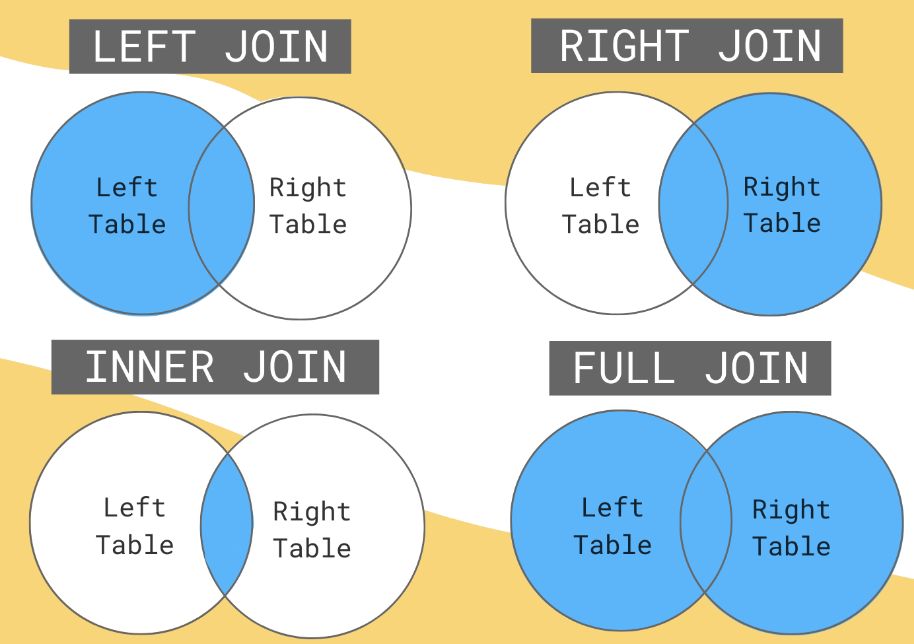


Выведем имя (`first_name`), фамилию (`second_name`), год рождения (`year_of_birth`) и название университета (`title`) студентов:

In [ ]:
cur.execute("""
SELECT first_name, second_name, year_of_birth, title
FROM people
JOIN university
ON people.university_id = university.id
""").fetchall()

[('Anna', 'Krilova', 2000, 'Saratov State University'),
 ('Daniil', 'Logunov', 1998, 'Saratov State Technical University'),
 ('Ivan', 'Popov', 1999, 'Saratov State Law Academy'),
 ('Alena', 'Silina', 1999, 'Saratov State Law Academy'),
 ('Konstantin', 'Sharov', 2001, 'Saratov State Technical University'),
 ('Anna', 'Teterina', 1998, 'Saratov State Technical University'),
 ('Stanislav', 'Vlasov', 2002, 'Saratov State Law Academy'),
 ('Ulyana', 'Likhacheva', 2000, 'Saratov State University'),
 ('Anna', 'Ivanova', 1999, 'Saratov State University'),
 ('Diana', 'Ovchinnikova', 1997, 'Saratov State Law Academy'),
 ('Valery', 'Zhdanov', 2002, 'Saratov State Technical University'),
 ('Alla', 'Kuznetsova', 2003, 'Saratov State Technical University')]

Посчитаем, сколько в каждом университете учится студентов:

In [ ]:
cur.execute("""
SELECT title, COUNT(*)
FROM university
JOIN people
ON people.university_id = university.id
GROUP BY title
""").fetchall()

[('Saratov State Law Academy', 4),
 ('Saratov State Technical University', 5),
 ('Saratov State University', 3)]

### Задание 2.1.5

(**1 балл**) Посчитайте средний (с использованием функции AVG) год рождения студентов в каждом университете.

In [ ]:
# Ваш код
cur.execute("""
SELECT title, ROUND(AVG(year_of_birth), 2)
FROM university
JOIN people
ON people.university_id = university.id
GROUP BY title
""").fetchall()


[('Saratov State Law Academy', 1999.25),
 ('Saratov State Technical University', 2000.4),
 ('Saratov State University', 1999.67)]

**+1 балл**

## DROP TABLE

Чтобы удалить таблицу:
``
DROP TABLE table_name
``

Удалим таблицу **university**:

In [ ]:
cur.execute("""
DROP TABLE university
""")

**Задание:** удалите таблицу **people**.

In [ ]:
# Ваш код
cur.execute("""
DROP TABLE people
""")


# Анализ реальных данных

## Подготовка данных

In [22]:
# Загружаем .csv файл в DataFrame:
df = pd.read_csv("titanic.csv", usecols=["Survived", "Pclass", "Name", "Sex", "Age", "Fare"])
df.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Name      887 non-null    object 
 3   Sex       887 non-null    object 
 4   Age       887 non-null    float64
 5   Fare      887 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.7+ KB


In [23]:
# Создадим соответствующую таблицу

cur.execute("""
CREATE TABLE titanic(
  survived INTEGER NOT NULL,
  pclass INTEGER NOT NULL,
  name TEXT NOT NULL,
  sex TEXT NOT NULL,
  age REAL NOT NULL,
  fare REAL NOT NULL
)
""")

Можно загружать в таблицу сразу много строк из списка с помощью такой конструкции:

```
data = [
    (0, 3, "Mr. Owen Harris Braund", "male", 22.0, 7.25),
    (1, 1, "Mrs. John Bradley", "female", 38.0, 71.2833)
]
cur.executemany("INSERT INTO titanic VALUES(?, ?, ?, ?, ?, ?)", data)
```


In [24]:
df.head().values  #  Имеем List[List], а мы хотим List[Tuple]

array([[0, 3, 'Mr. Owen Harris Braund', 'male', 22.0, 7.25],
       [1, 1, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
        'female', 38.0, 71.2833],
       [1, 3, 'Miss. Laina Heikkinen', 'female', 26.0, 7.925],
       [1, 1, 'Mrs. Jacques Heath (Lily May Peel) Futrelle', 'female',
        35.0, 53.1],
       [0, 3, 'Mr. William Henry Allen', 'male', 35.0, 8.05]],
      dtype=object)

In [25]:
data = [tuple(val) for val in df.head().values]
data  # То, что нужно

[(0, 3, 'Mr. Owen Harris Braund', 'male', 22.0, 7.25),
 (1,
  1,
  'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
  'female',
  38.0,
  71.2833),
 (1, 3, 'Miss. Laina Heikkinen', 'female', 26.0, 7.925),
 (1, 1, 'Mrs. Jacques Heath (Lily May Peel) Futrelle', 'female', 35.0, 53.1),
 (0, 3, 'Mr. William Henry Allen', 'male', 35.0, 8.05)]

In [26]:
data = [tuple(val) for val in df.values]
cur.executemany("INSERT INTO titanic VALUES(?, ?, ?, ?, ?, ?)", data)


Проверим, что мы загрузили все строки в таблицу:


In [27]:
df.shape[0]

887

In [28]:
cur.execute("""
SELECT COUNT(*) FROM titanic
""").fetchall()

[(887,)]

## Анализ получившихся данных

Выведем имена и возраст погибших пассажирок из первого класса в отсортированном порядке по возрасту (от меньшего к большему):

In [29]:
df[(df["Pclass"] == 1) & (df["Survived"] == 0) & (df["Sex"] == "female")].sort_values("Age")

,Survived,Pclass,Name,Sex,Age,Fare
295,0,1,Miss. Helen Loraine Allison,female,2.0,151.5500
495,0,1,Mrs. Hudson J C (Bessie Waldo Daniels) Allison,female,25.0,151.5500
176,0,1,Miss. Ann Elizabeth Isham,female,50.0,28.7125


In [30]:
cur.execute("""
SELECT name, age
FROM titanic
WHERE pclass = 1
      AND sex = 'female'
      AND survived = 0
ORDER BY age
""").fetchall()

[('Miss. Helen Loraine Allison', 2.0),
 ('Mrs. Hudson J C (Bessie Waldo Daniels) Allison', 25.0),
 ('Miss. Ann Elizabeth Isham', 50.0)]

Узнаем средний возраст выживших и погибших:

In [31]:
df.groupby(["Survived"])["Age"].mean()

Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

In [32]:
cur.execute("""
SELECT survived, AVG(age)
FROM titanic
GROUP BY survived
""").fetchall()

[(0, 30.13853211009174), (1, 28.408391812865496)]

### Задание 2.2.1

(**1 балл**) Вывести минимальный возраст погибших (только погибших!) отдельно среди мужчин и отдельно среди женщин (в одном запросе).

In [33]:
# Ваш код на Pandas
df[(df["Survived"] == 0)].groupby(["Sex"])[["Survived", "Age"]].min()


,Survived,Age
Sex,,
female,0,2.0
male,0,1.0


In [34]:
# Ваш код на SQL
cur.execute("""
SELECT sex, survived, MIN(age)
FROM titanic
WHERE survived = 0
GROUP BY sex
""").fetchall()


[('female', 0, 2.0), ('male', 0, 1.0)]

**+1 балл**

### Задание 2.2.2

(**1 балл**) Вывести долю выживших по каждому классу и полу

In [35]:
# Ваш код на Pandas
df.groupby(["Pclass", "Sex"])["Survived"].mean()


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.137026
Name: Survived, dtype: float64

In [36]:
# Ваш код на SQL
cur.execute("""
SELECT pclass, sex, AVG(survived)
FROM titanic
GROUP BY pclass, sex
""").fetchall()


[(1, 'female', 0.9680851063829787),
 (1, 'male', 0.36885245901639346),
 (2, 'female', 0.9210526315789473),
 (2, 'male', 0.1574074074074074),
 (3, 'female', 0.5),
 (3, 'male', 0.13702623906705538)]

**+1 балл**

PS: когда речь про доли, то можно оставлять без умножения на 100 - это окей

Всё отлично!